# 4 Capstone II Preprocessing and Training

## Introduction

Create and assess models.

Validate

# 4.1 Imports

In [1]:
import os
from library.sb_utils import save_file

import pandas as pd
import numpy as np

import datetime
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import __version__ as sklearn_version

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.pipeline import make_pipeline

# 4.2 Load The Data

## 4.2.1 Profiles Data

In [2]:
# Load the data
full_data = pd.read_csv('../data/data_step3_features.csv')

In [3]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RFY-PADD            969 non-null    object 
 1   RFY-PAD-Sub         969 non-null    object 
 2   RFY-PAD-District    969 non-null    object 
 3   RFY_ID              969 non-null    object 
 4   RFY_BPCD            969 non-null    int64  
 5   CATCRKRECYL         969 non-null    float64
 6   CATHYDRCRCK         969 non-null    float64
 7   CATHYDTRMT          969 non-null    float64
 8   CATLREFORM          969 non-null    float64
 9   CATLYTCRCK          969 non-null    float64
 10  COKING              969 non-null    float64
 11  FUELSOLDEASP        969 non-null    float64
 12  THERMCRCK           969 non-null    float64
 13  VACMDIST            969 non-null    float64
 14  Crude_API           969 non-null    float64
 15  NG_Yield_PAD        969 non-null    float64
 16  GSL_Yiel

In [7]:
data = full_data.iloc[:, np.r_[2:5, 14:24, 71, 38, 53:64]]

In [8]:
data.head().T

,0,1,2,3,4
RFY-PAD-District,PAD-3-3,PAD-3-3,PAD-3-3,PAD-3-4,PAD-3-4
RFY_ID,RFY-001,RFY-002,RFY-003,RFY-009,RFY-010
RFY_BPCD,87500,48000,4100,83000,7500
Crude_API,30.1708,30.1708,30.1708,29.845,29.845
NG_Yield_PAD,9.08333,9.08333,9.08333,3.925,3.925
GSL_Yield_PAD,43.775,43.775,43.775,30.075,30.075
DSL_Yield_PAD,41.5917,41.5917,41.5917,36.295,36.295
RESID_Yield_PAD,11.825,11.825,11.825,29.4512,29.4512
WTI_Price,97.9058,97.9058,97.9058,97.9058,97.9058
WTI_Diff,3.64583,3.64583,3.64583,3.64583,3.64583


In [9]:
# Get the row index of the fictional observation for the FALCON refinery, with 'RFY_ID': 'RFY-201':
data[data['RFY_ID'] == 'RFY-201'].T

,968
RFY-PAD-District,PAD-2-2
RFY_ID,RFY-201
RFY_BPCD,50000
Crude_API,26.1155
NG_Yield_PAD,2.55
GSL_Yield_PAD,41.75
DSL_Yield_PAD,50.88
RESID_Yield_PAD,6.77
WTI_Price,38.5191
WTI_Diff,-6.04909


## 4.2.2 Prepare source data for training/test split

In [10]:
# Separate the fictional observations into its own dataframe
falcon_data = data[data['RFY_ID'] == 'RFY-201']

In [11]:
# Separate the actual observations into another dataframe
rfy_data = data.iloc[np.r_[0:968], :]

In [12]:
# Check that no fictional observations are left in the actual observations data set
rfy_data[rfy_data['RFY_ID'] == 'RFY-201']

,RFY-PAD-District,RFY_ID,RFY_BPCD,Crude_API,NG_Yield_PAD,GSL_Yield_PAD,DSL_Yield_PAD,RESID_Yield_PAD,WTI_Price,WTI_Diff,...,PAD-1-2,PAD-2-1,PAD-2-2,PAD-2-3,PAD-3-2,PAD-3-3,PAD-3-4,PAD-3-5,PAD-4,PAD-5


# 4.3 Split Data into Train/Test partitions

## 4.3.1 Split 70/30

In [13]:
# estimate partition sizes
round(len(rfy_data)*.7), round(len(rfy_data)*.3)

(678, 290)

In [15]:
# Train/Test split
# remove object variables, keep only numerical
X_train, X_test, y_train, y_test = train_test_split(rfy_data.drop(columns=['SPECF_RFY_CRCK','RFY-PAD-District',
                                                                           'RFY_ID']),
                                                   rfy_data['SPECF_RFY_CRCK'], test_size=0.3, random_state=47)

In [16]:
X_train.shape, X_test.shape

((677, 23), (291, 23))

In [17]:
y_train.shape, y_test.shape

((677,), (291,))

## 4.3.2 Metrics

### 4.3.2.1 Dummy Regressor

In [18]:
# calculate the mean of 'y_train'
train_mean = y_train.mean()
train_mean

25.28032322500826

In [19]:
# Fit dummy regressor on training data
d_reg = DummyRegressor(strategy='mean')
d_reg.fit(X_train, y_train)
d_reg.constant_

array([[25.28032323]])

### 4.3.2.2 sklearn Metrics

In [20]:
# Use dummy regressor to create an array of the training set length, populated with its mean value
y_tr_pred = d_reg.predict(X_train)
y_tr_pred[:5]

array([25.28032323, 25.28032323, 25.28032323, 25.28032323, 25.28032323])

In [21]:
# create an array of the test set length, but populated with the training set mean value:
y_test_pred = train_mean * np.ones(len(y_test))
y_test_pred[:5]

array([25.28032323, 25.28032323, 25.28032323, 25.28032323, 25.28032323])

#### Calculate the R-squared score on the training set:

In [22]:
r2_score(y_train, y_tr_pred)

0.0

#### Calculate the R-squared score on the test set:

In [23]:
r2_score(y_test, y_test_pred)

-0.008641972051672386

As expected, the performance of R-squared score on a test set is slightly worse than on the training set.

#### Mean Absolute Error (MAE) - on the training and the test sets:

In [24]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_test_pred)

(4.924188646289532, 4.723307597813835)

# 4.4. Models

#### Make initial predictions:
* scale the features
* train a model
* assess model performance

## 4.4.1 Initial predictions

### 4.4.1.1 Scale the features

In [25]:
# Fit the scaler on the training data
# Use 'transofrm()' method to apply the scaling on the train and test split
scaler = StandardScaler()
scaler.fit(X_train)

X_tr_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 3.4.1.2 Verify Scaling

Verify and compare scaling for the training and test sets - mean (is close to zero?), standard deviation (is close to 1?)

In [26]:
X_tr_scaled.mean(), X_tr_scaled.std()

(-1.9530684664139932e-16, 0.9999999999999999)

In [27]:
X_test_scaled.mean(), X_test_scaled.std()

(-0.01237761514211575, 0.9875803298405648)

### 4.4.1.2 Train the model on the train split

In [28]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

### 4.4.1.3 Make prediciotns using the model on the train and test splits:

In [29]:
# Call the 'predict()' method of the 'lm' model on the scaled train and test splits:
y_tr_pred = lm.predict(X_tr_scaled)
y_test_pred = lm.predict(X_test_scaled)

### 4.4.1.4 Assess model performance:

#### R-squared scores:

In [30]:
# R-squared scores on the training and test data:
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_test_pred)
median_r2

(0.9737099054205977, 0.9624671808356309)

It looks like the 'lm' linear regresion model explains 96%+ of the variance on both the training and test data sets.

#### Mean Absolute Error scores:

In [31]:
# Mean absolue error scores on the train and test splits:
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_test_pred)
median_mae

(0.9194906683078388, 1.0491480402993367)

This model is expected to estimate the aggregate crack srpread for a given refinery within $1.0/Bbl of the real crack spread value.

#### Mean Squared Error scores:

In [32]:
# Mean squared error scores on the train and test splits:
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_test_pred)
median_mse

(1.2097681066201211, 1.558476606513198)

In [33]:
# a square root of the mse, for the root mean square error:
# np.sqrt([mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_test_pred)])
np.sqrt(median_mse)

array([1.09989459, 1.24838961])

#### Next, create a pipline, a single object for feature scaling and regression process steps

## 4.4.2 Pipelines

#### We will create a pipline that will define the same steps as above:
- Scale the data to zero mean and unit variance
- train a linear regression model
- assess the model performance

### 4.4.2.1 Define the pipeline:

In [34]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LinearRegression()
)

### 4.4.2.2 Fit the pipeline:

In [35]:
# Scaling: determine the mean to substract to get to zero, determine the variance to divide by to get to 1
# Train the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

### 4.4.2.3 Make predictions on the train and test sets

In [36]:
y_tr_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

### 4.4.2.4 Assess performance

In [37]:
# R-squared scores on the training and test data - compare with previous 'non-pipeline' results:
'pipeline results: ', r2_score(y_train, y_tr_pred), r2_score(y_test, y_test_pred), 'non-pipline results: ', median_r2

('pipeline results: ',
 0.9737099054205977,
 0.9624671808356309,
 'non-pipline results: ',
 (0.9737099054205977, 0.9624671808356309))

In [38]:
# Mean absolue error scores on the train and test splits - compare with previous 'non-pipeline' results::
'pipeline results: ', mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_test_pred), 'non-pipeline results: ', median_mae

('pipeline results: ',
 0.9194906683078388,
 1.0491480402993367,
 'non-pipeline results: ',
 (0.9194906683078388, 1.0491480402993367))

In [39]:
# Mean squared error scores on the train and test splits - compare with previous 'non-pipeline' results:
'pipeline results: ', mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_test_pred), 'non-pipeline results: ', median_mse


('pipeline results: ',
 1.2097681066201211,
 1.558476606513198,
 'non-pipeline results: ',
 (1.2097681066201211, 1.558476606513198))

Pipeline results match with the earlier assessments

# 4.5 Refine the model

## 4.5.1 Re-define the pipeline

### 4.5.1.1 Add a Feature selection function:

Add a sklearn's SelectKBest feature selection function

In [40]:
# Use the SelectKBest's default k=10
pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    SelectKBest(f_regression, k=10),
    LinearRegression()
)

### 4.5.1.2 Fit the pipeline

In [41]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x00000250C1530F70>)),
                ('linearregression', LinearRegression())])

### 4.5.1.3 Assess performance on the train and test sets

In [42]:
y_tr_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [43]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_test_pred)

(0.9224940455307427, 0.9114559432247322)

In [44]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_test_pred)

(1.5277648977859613, 1.537619581797629)

Since the assessment results look worse than before adding the feature selection function (set at default k=10), we will try k=12

### 4.5.1.4 Pipeline with a higher value k=12

In [45]:
# Use k=12 for the SelectKBest
pipe12 = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    SelectKBest(f_regression, k=12),
    LinearRegression()
)

### 4.5.1.5 Fit the pipeline

In [46]:
pipe12.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=12,
                             score_func=<function f_regression at 0x00000250C1530F70>)),
                ('linearregression', LinearRegression())])

### 4.5.1.6 Assess performance on the train and test sets

In [47]:
y_tr_pred = pipe12.predict(X_train)
y_test_pred = pipe12.predict(X_test)

In [48]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_test_pred)

(0.9615159844529582, 0.9546830905133749)

In [49]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_test_pred)

(1.1606977524466249, 1.2017949308932019)

#### The performance has improved; however, we need the model to generalize to new data. We will use the cross-validation next.

## 4.5.2 Performance Assessment with Cross-Validation

#### Use the previous pipeline steps and cross-validation folds cv=5

In [50]:
cv_results = cross_validate(pipe12, X_train, y_train, cv=5)

In [51]:
cv_scores = cv_results['test_score']
cv_scores

array([0.95893218, 0.95601445, 0.95812815, 0.96074164, 0.96159587])

In [52]:
np.mean(cv_scores), np.std(cv_scores)

(0.9590824573881628, 0.0019705866407289233)

In [53]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.96, 0.96])

## 4.5.3 Hyperparameter search using GridSearchCV

We will now run the pipeline and cross-validation technique for multiple values of k to pick the best performance.

In [54]:
# Get the dictionary of available parameters:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

##### Caluclate the range of k to investigate:

In [55]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

##### Deterine the best value k:

In [56]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [57]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x00000250C1530F70>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23]})

In [58]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [59]:
score_mean

array([0.7490734 , 0.83168343, 0.84948829, 0.88028582, 0.90438727,
       0.90713635, 0.90757281, 0.90749442, 0.90798026, 0.91759851,
       0.93657169, 0.95908246, 0.96394521, 0.96399645, 0.96427955,
       0.9639143 , 0.96399693, 0.96687844, 0.96825419, 0.97009622,
       0.97045676, 0.97028124, 0.97028124])

In [60]:
score_std

array([0.0241717 , 0.00857218, 0.01312895, 0.01007496, 0.01006245,
       0.00980316, 0.00951613, 0.00769321, 0.00773203, 0.00694132,
       0.01688837, 0.00197059, 0.00336503, 0.00331909, 0.00308829,
       0.00359095, 0.003868  , 0.00346618, 0.00395001, 0.00187782,
       0.00197173, 0.00196182, 0.00196182])

In [61]:
cv_k

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [62]:
lr_grid_cv.best_params_

{'selectkbest__k': 21}

##### Assign the best value of k determined above to 'best_k' - plot the CV score against values of k:

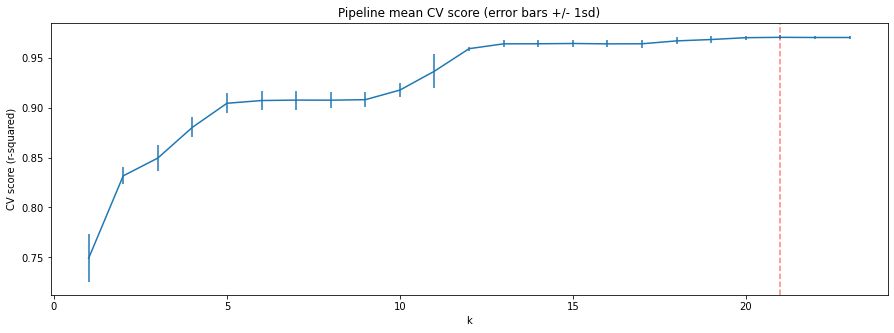

In [63]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(15, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

The hyperparameter search has determined that the best value for k is 12. Let's look at which features were most useful.

In [64]:
# logical mask of the selected features
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
selected

array([ True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

##### Access the named step of the model and its coefficients:

In [65]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Brent_Price        19.646932
RESID_Yield_PAD     5.184752
DSL_Yield_PAD       4.557513
GSL_Yield_PAD       1.694680
PAD-2-1             1.451130
PAD-2-3             0.729682
PAD-3-5             0.531510
PAD-3-2             0.447656
PAD-1-1             0.265657
RFY_BPCD            0.028858
BPD_DENS_SPECF     -0.043403
PAD-2-2            -0.139015
PAD-4              -0.186242
PAD-5              -0.190866
Brent_Diff         -0.324921
Crude_API          -0.362464
PAD-3-3            -0.485433
PAD-1-2            -1.761482
PAD-3-4            -1.838124
WTI_Diff           -6.082690
WTI_Price         -18.210838
dtype: float64

The Linear Regression model indicates that the Net Crackspreads are mostly driven by:
- Brent Price: maybe, it is - we see a highly negative correlation with the domestic WTI Price, so it could be that the cheaper imported crude does have a big impact on the refinery economics
- Residue Yield - this is the heavier fraction and is in negative correlation with the lighter fractions, i.e. the Diesel and Gasoline yields
- Diesel and Gasoline Yields - these are the light products, which are sought out most on the market and bring in the bulk of refineries profits
- There's a strong negative correlation with domestic crude oil WTI price, as well as WTI price differential

# 4.6 Random Forest Model

## 4.6.1 Define the pipeline for Random Forest

In [66]:
# Define a new pipeline for the  Random Forest model
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

## 4.6.2 Fit and assess performance using cross-validation

In [67]:
# Call 'cross-validate' to assess the pipeline's performance
# pass the random forest pipe object, 'X_train' and 'y_train' to the 'cross-validate method', using 5-fold cv
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [68]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.99877241, 0.99674376, 0.99822031, 0.98874243, 0.99451335])

In [69]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.9953984525651727, 0.0036398459411809453)

## 4.6.3 Hyperparameter search using GridSearchCV

### 4.6.3.1 Run grid search cross-validation for Random Forest:

In [70]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [71]:
# Call 'GridSearchCV' with the random forest pipeline, 'grid_params' dict, cv=5
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [72]:
# Start the grid search:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [73]:
# print the best params from the above grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 54,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [74]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.99879713, 0.99683619, 0.99780807, 0.99009297, 0.99496378])

In [75]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.9956996276100171, 0.003075966277224161)

Not much of a difference

##### Assign the 'feature_importances' attribue to 'imps' - plot the Importance against the feature column names:

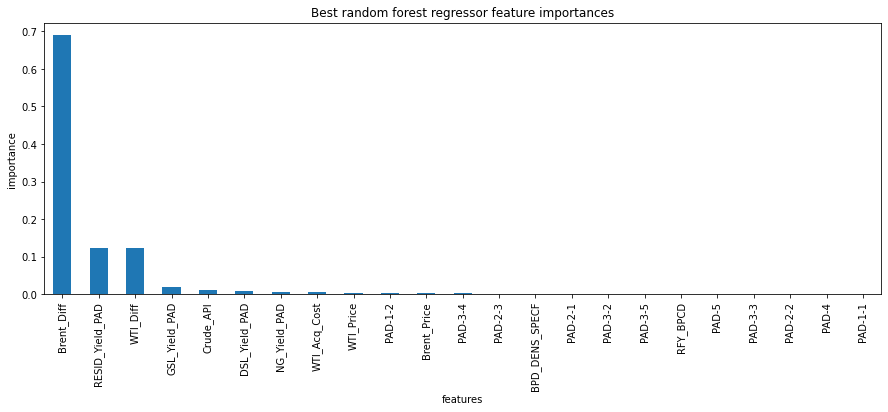

In [76]:
plt.subplots(figsize=(15, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

The Random Forest returned a much more sensible ranking of the importance features than the linear model:
* Brent_Diff - discount off/premium on the imported Brent crude oil, which does have effect on the domestic crude sales
* WTI_Diff - discount/premimium for domestic WTI crude oil price
* RESID_Yield_PAD - as opposed to the Linear Regression model, Random Forest model placed the Residue Yield as of a higher importance than Diesel and Gasoline yields. This makes sense, as the heavier fractions of products, refined frmo crude what indicates how much light product yields a refinery was able to extract
* GSL_Yield_PAD - how much gasoline a given refinery could produce per each barrel of crude processed
* DSL_Yield_PAD - how much diesel a given refinery could produce per each barrel of crude processed
* Crude_API - quality of crude
* WTI_Acq_Cost - actual crude oil price paid by refineries

## 4.7 Model Selection

## 4.7.1 Linear regression model performance

In [77]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [78]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(0.9667515898646842, 0.05328669132393239)

In [79]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

1.0635026439075164

## 4.7.2 Random forest regression model performance

In [80]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [81]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(0.13504325308257895, 0.052202895747172025)

In [82]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

0.07832461610179732

## 4.7.3 Conculsion

Clearly, the random forest model shows a lot less variability and much lower cross-validation mean absolute error.

## 4.8 Data quality assessment

Assess how much performance varies with differing data set sizes:

In [83]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_eq

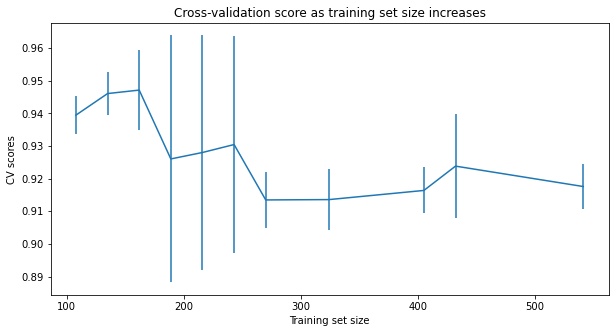

In [84]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

The plot shows that the improvement of the model score performance starts flattening at around 250 sample size

## 4.9 Save the best model object from pipeline

In [85]:
# Get the basic information about the best model
best_model = rf_grid_cv.best_estimator_
best_model.version = ___
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [86]:
# Save the model
modelpath = '../models'
save_file(best_model, 'refinery_crackspread_model_B.pkl', modelpath)

Writing file.  "../models\refinery_crackspread_model_B.pkl"


# 3.6 Summary

In [87]:
best_model.X_columns

['RFY_BPCD',
 'Crude_API',
 'NG_Yield_PAD',
 'GSL_Yield_PAD',
 'DSL_Yield_PAD',
 'RESID_Yield_PAD',
 'WTI_Price',
 'WTI_Diff',
 'WTI_Acq_Cost',
 'Brent_Price',
 'Brent_Diff',
 'BPD_DENS_SPECF',
 'PAD-1-1',
 'PAD-1-2',
 'PAD-2-1',
 'PAD-2-2',
 'PAD-2-3',
 'PAD-3-2',
 'PAD-3-3',
 'PAD-3-4',
 'PAD-3-5',
 'PAD-4',
 'PAD-5']